In [1]:
# ****************************************************** LOTTERY AI PREDICTOR ******************************************************
# Install Selenium for Google Colab
%pip install google-colab-selenium

# Imports
import google_colab_selenium as gs
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import time
import warnings
import numpy as np
import seaborn as sns
from datetime import datetime

warnings.filterwarnings('ignore')

# Target website
website = 'https://www.singaporepools.com.sg/en/product/sr/Pages/toto_results.aspx?sppl=RHJhd051bWJlcj0zODY5'

# Launch Chrome in Google Colab environment
driver = gs.Chrome()
driver.get(website)
time.sleep(3)

# Initialize dropdown and number of entries
dropdowns = Select(driver.find_element(By.XPATH, "//select[@class = 'form-control selectDrawList']"))
no_of_dropdowns = len(dropdowns.options)

# Data containers
date, number_draw = [], []
winning_number_1, winning_number_2, winning_number_3 = [], [], []
winning_number_4, winning_number_5, winning_number_6 = [], [], []
additional_number = []

amount_group1_lst, amount_group2_lst, amount_group3_lst = [], [], []
amount_group4_lst, amount_group5_lst, amount_group6_lst, amount_group7_lst = [], [], [], []

winner_group1_lst, winner_group2_lst, winner_group3_lst = [], [], []
winner_group4_lst, winner_group5_lst, winner_group6_lst, winner_group7_lst = [], [], [], []

# Scrape each draw
for i in range(no_of_dropdowns):
    dropdown = Select(driver.find_element(By.XPATH, "//select[@class = 'form-control selectDrawList']"))
    dropdown.select_by_index(i)
    time.sleep(3)

    # Extract date
    d = driver.find_element(By.XPATH, "//th[@class = 'drawDate']").text
    datetime_date = pd.to_datetime(d, format='%a, %d %b %Y')

    # Filter to only include data from the last 3 years
    if datetime_date < pd.to_datetime('today') - pd.DateOffset(years=3):
        continue

    # Format and extract data
    formatted_date = datetime_date.strftime('%d/%m/%Y')
    nd = driver.find_element(By.XPATH, "//th[@class = 'drawNumber']").text

    w1 = driver.find_element(By.XPATH, "//td[@class = 'win1']").text
    w2 = driver.find_element(By.XPATH, "//td[@class = 'win2']").text
    w3 = driver.find_element(By.XPATH, "//td[@class = 'win3']").text
    w4 = driver.find_element(By.XPATH, "//td[@class = 'win4']").text
    w5 = driver.find_element(By.XPATH, "//td[@class = 'win5']").text
    w6 = driver.find_element(By.XPATH, "//td[@class = 'win6']").text
    add_no = driver.find_element(By.XPATH, "//td[@class = 'additional']").text

    # Extract share amounts
    amount_group1 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[2]/td[2]').text
    amount_group2 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[3]/td[2]').text
    amount_group3 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[4]/td[2]').text
    amount_group4 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[5]/td[2]').text
    amount_group5 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[6]/td[2]').text
    amount_group6 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[7]/td[2]').text
    amount_group7 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[8]/td[2]').text

    # Extract winners
    winner_group1 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[2]/td[3]').text
    winner_group2 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[3]/td[3]').text
    winner_group3 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[4]/td[3]').text
    winner_group4 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[5]/td[3]').text
    winner_group5 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[6]/td[3]').text
    winner_group6 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[7]/td[3]').text
    winner_group7 = driver.find_element(By.XPATH, '//table[5]/tbody/tr[8]/td[3]').text

    # Append to lists
    date.append(formatted_date)
    number_draw.append(nd[-4:])
    winning_number_1.append(w1)
    winning_number_2.append(w2)
    winning_number_3.append(w3)
    winning_number_4.append(w4)
    winning_number_5.append(w5)
    winning_number_6.append(w6)
    additional_number.append(add_no)

    amount_group1_lst.append(amount_group1)
    amount_group2_lst.append(amount_group2)
    amount_group3_lst.append(amount_group3)
    amount_group4_lst.append(amount_group4)
    amount_group5_lst.append(amount_group5)
    amount_group6_lst.append(amount_group6)
    amount_group7_lst.append(amount_group7)

    winner_group1_lst.append(winner_group1)
    winner_group2_lst.append(winner_group2)
    winner_group3_lst.append(winner_group3)
    winner_group4_lst.append(winner_group4)
    winner_group5_lst.append(winner_group5)
    winner_group6_lst.append(winner_group6)
    winner_group7_lst.append(winner_group7)

# Close browser
driver.quit()

# Create and save DataFrame
df = pd.DataFrame({
    'number_draw': number_draw, 'date': date,
    'winning_number_1': winning_number_1, 'winning_number_2': winning_number_2,
    'winning_number_3': winning_number_3, 'winning_number_4': winning_number_4,
    'winning_number_5': winning_number_5, 'winning_number_6': winning_number_6,
    'additional_number': additional_number,
    'Group 1 Share Amount': amount_group1_lst, 'Group 2 Share Amount': amount_group2_lst,
    'Group 3 Share Amount': amount_group3_lst, 'Group 4 Share Amount': amount_group4_lst,
    'Group 5 Share Amount': amount_group5_lst, 'Group 6 Share Amount': amount_group6_lst,
    'Group 7 Share Amount': amount_group7_lst,
    'Group 1 No.winning': winner_group1_lst, 'Group 2 No.winning': winner_group2_lst,
    'Group 3 No.winning': winner_group3_lst, 'Group 4 No.winning': winner_group4_lst,
    'Group 5 No.winning': winner_group5_lst, 'Group 6 No.winning': winner_group6_lst,
    'Group 7 No.winning': winner_group7_lst
})

# Reverse to sort oldest first
df_rev = df[::-1].reset_index(drop=True)

# Save to CSV
df_rev.to_csv('Dataset_toto.csv', index=False)

# For Google Colab: download the CSV to local machine
from google.colab import files
files.download('Dataset_toto.csv')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 40.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('Dataset_toto.csv')

In [4]:
df

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning
0,3768,26/05/2022,6,11,30,34,43,45,2,-,"$236,294","$1,826",$446,$50,$25,$10,-,1,89,199,"4,774","6,520","87,047"
1,3769,30/05/2022,8,13,19,34,37,47,29,"$2,781,563","$87,325","$1,716",$375,$50,$25,$10,1,4,140,350,"6,329","8,735","123,159"
2,3770,02/06/2022,12,19,26,28,46,49,41,-,"$237,188","$1,664",$466,$50,$25,$10,-,1,98,191,"4,839","5,244","88,337"
3,3771,06/06/2022,12,28,29,34,41,47,16,"$1,379,328","$171,791","$2,813",$462,$50,$25,$10,2,2,84,279,"5,935","8,748","115,382"
4,3772,09/06/2022,7,14,15,16,17,38,44,-,"$234,345","$1,452",$440,$50,$25,$10,-,1,111,200,"5,759","6,091","100,004"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,4076,08/05/2025,9,13,17,39,46,47,22,-,"$132,631","$1,689",$474,$50,$25,$10,-,2,108,210,"4,939","6,836","94,717"
309,4077,12/05/2025,6,16,20,23,40,48,45,-,"$65,997","$1,973",$401,$50,$25,$10,-,6,138,371,"7,856","9,907","151,903"
310,4078,15/05/2025,9,16,17,20,34,38,18,"$6,029,737","$202,727","$2,248",$415,$50,$25,$10,1,3,186,550,"12,073","18,150","228,643"
311,4079,19/05/2025,2,15,17,18,39,45,26,"$1,279,986","$134,736","$1,971",$410,$50,$25,$10,1,2,94,247,"4,805","7,014","95,577"


In [5]:
# Check for missing value
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   number_draw           313 non-null    int64 
 1   date                  313 non-null    object
 2   winning_number_1      313 non-null    int64 
 3   winning_number_2      313 non-null    int64 
 4   winning_number_3      313 non-null    int64 
 5   winning_number_4      313 non-null    int64 
 6   winning_number_5      313 non-null    int64 
 7   winning_number_6      313 non-null    int64 
 8   additional_number     313 non-null    int64 
 9   Group 1 Share Amount  313 non-null    object
 10  Group 2 Share Amount  313 non-null    object
 11  Group 3 Share Amount  313 non-null    object
 12  Group 4 Share Amount  313 non-null    object
 13  Group 5 Share Amount  313 non-null    object
 14  Group 6 Share Amount  313 non-null    object
 15  Group 7 Share Amount  313 non-null    ob

In [8]:
# Replace '-' with 0
df[['Group 1 Share Amount', 'Group 2 Share Amount', 'Group 1 No.winning', 'Group 2 No.winning']] = df[['Group 1 Share Amount', 'Group 2 Share Amount', 'Group 1 No.winning', 'Group 2 No.winning']].replace('-', 0)

In [9]:
# Remove $ and ,
some_lst = ['Group 1 Share Amount','Group 2 Share Amount', 'Group 3 Share Amount', 'Group 4 Share Amount','Group 5 Share Amount', 'Group 6 Share Amount',
    'Group 7 Share Amount','Group 1 No.winning', 'Group 2 No.winning', 'Group 3 No.winning','Group 4 No.winning', 'Group 5 No.winning',
    'Group 6 No.winning','Group 7 No.winning']

In [10]:
df[some_lst] = df[some_lst].replace('[\$,]', '', regex=True).astype(int)

In [11]:
df.tail()

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning
308,4076,08/05/2025,9,13,17,39,46,47,22,0,132631,1689,474,50,25,10,0,2,108,210,4939,6836,94717
309,4077,12/05/2025,6,16,20,23,40,48,45,0,65997,1973,401,50,25,10,0,6,138,371,7856,9907,151903
310,4078,15/05/2025,9,16,17,20,34,38,18,6029737,202727,2248,415,50,25,10,1,3,186,550,12073,18150,228643
311,4079,19/05/2025,2,15,17,18,39,45,26,1279986,134736,1971,410,50,25,10,1,2,94,247,4805,7014,95577
312,4080,22/05/2025,3,10,32,34,44,48,29,0,0,1863,574,50,25,10,0,0,96,170,4360,5909,85351


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   number_draw           313 non-null    int64 
 1   date                  313 non-null    object
 2   winning_number_1      313 non-null    int64 
 3   winning_number_2      313 non-null    int64 
 4   winning_number_3      313 non-null    int64 
 5   winning_number_4      313 non-null    int64 
 6   winning_number_5      313 non-null    int64 
 7   winning_number_6      313 non-null    int64 
 8   additional_number     313 non-null    int64 
 9   Group 1 Share Amount  313 non-null    int64 
 10  Group 2 Share Amount  313 non-null    int64 
 11  Group 3 Share Amount  313 non-null    int64 
 12  Group 4 Share Amount  313 non-null    int64 
 13  Group 5 Share Amount  313 non-null    int64 
 14  Group 6 Share Amount  313 non-null    int64 
 15  Group 7 Share Amount  313 non-null    in

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.strftime('%A')

In [14]:
df

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week
0,3768,2022-05-26,6,11,30,34,43,45,2,0,236294,1826,446,50,25,10,0,1,89,199,4774,6520,87047,2022,5,Thursday
1,3769,2022-05-30,8,13,19,34,37,47,29,2781563,87325,1716,375,50,25,10,1,4,140,350,6329,8735,123159,2022,5,Monday
2,3770,2022-06-02,12,19,26,28,46,49,41,0,237188,1664,466,50,25,10,0,1,98,191,4839,5244,88337,2022,6,Thursday
3,3771,2022-06-06,12,28,29,34,41,47,16,1379328,171791,2813,462,50,25,10,2,2,84,279,5935,8748,115382,2022,6,Monday
4,3772,2022-06-09,7,14,15,16,17,38,44,0,234345,1452,440,50,25,10,0,1,111,200,5759,6091,100004,2022,6,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,4076,2025-05-08,9,13,17,39,46,47,22,0,132631,1689,474,50,25,10,0,2,108,210,4939,6836,94717,2025,5,Thursday
309,4077,2025-05-12,6,16,20,23,40,48,45,0,65997,1973,401,50,25,10,0,6,138,371,7856,9907,151903,2025,5,Monday
310,4078,2025-05-15,9,16,17,20,34,38,18,6029737,202727,2248,415,50,25,10,1,3,186,550,12073,18150,228643,2025,5,Thursday
311,4079,2025-05-19,2,15,17,18,39,45,26,1279986,134736,1971,410,50,25,10,1,2,94,247,4805,7014,95577,2025,5,Monday


In [15]:
winning_number = ['winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'winning_number_6','additional_number']

In [16]:
# Count Number of Odd & Even winning numbers in each draw
df['Odd'] = df[winning_number].apply(lambda row: sum(x % 2 != 0 for x in row), axis=1)
df['Even'] = df[winning_number].apply(lambda row: sum(x % 2 == 0 for x in row), axis=1)

In [17]:
# Count Number of winning numbers falling into 1 - 9, 10 - 19, 20 - 29, 30 - 39, 40 - 49 buckets
df['1 to 9'] = df[winning_number].apply(lambda row: sum(0 < x < 10 for x in row), axis=1)
df['10 to 19'] = df[winning_number].apply(lambda row: sum(10 <= x <= 19 for x in row), axis=1)
df['20 to 29'] = df[winning_number].apply(lambda row: sum(20 <= x <= 29 for x in row), axis=1)
df['30 to 39'] = df[winning_number].apply(lambda row: sum(30 <= x <= 39 for x in row), axis=1)
df['40 to 49'] = df[winning_number].apply(lambda row: sum(40 <= x <= 49 for x in row), axis=1)

In [18]:
df

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week,Odd,Even,1 to 9,10 to 19,20 to 29,30 to 39,40 to 49
0,3768,2022-05-26,6,11,30,34,43,45,2,0,236294,1826,446,50,25,10,0,1,89,199,4774,6520,87047,2022,5,Thursday,3,4,2,1,0,2,2
1,3769,2022-05-30,8,13,19,34,37,47,29,2781563,87325,1716,375,50,25,10,1,4,140,350,6329,8735,123159,2022,5,Monday,5,2,1,2,1,2,1
2,3770,2022-06-02,12,19,26,28,46,49,41,0,237188,1664,466,50,25,10,0,1,98,191,4839,5244,88337,2022,6,Thursday,3,4,0,2,2,0,3
3,3771,2022-06-06,12,28,29,34,41,47,16,1379328,171791,2813,462,50,25,10,2,2,84,279,5935,8748,115382,2022,6,Monday,3,4,0,2,2,1,2
4,3772,2022-06-09,7,14,15,16,17,38,44,0,234345,1452,440,50,25,10,0,1,111,200,5759,6091,100004,2022,6,Thursday,3,4,1,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,4076,2025-05-08,9,13,17,39,46,47,22,0,132631,1689,474,50,25,10,0,2,108,210,4939,6836,94717,2025,5,Thursday,5,2,1,2,1,1,2
309,4077,2025-05-12,6,16,20,23,40,48,45,0,65997,1973,401,50,25,10,0,6,138,371,7856,9907,151903,2025,5,Monday,2,5,1,1,2,0,3
310,4078,2025-05-15,9,16,17,20,34,38,18,6029737,202727,2248,415,50,25,10,1,3,186,550,12073,18150,228643,2025,5,Thursday,2,5,1,3,1,2,0
311,4079,2025-05-19,2,15,17,18,39,45,26,1279986,134736,1971,410,50,25,10,1,2,94,247,4805,7014,95577,2025,5,Monday,4,3,1,3,1,1,1


In [19]:
# Find the Total, Average and Standard Deviation
df['Total'] = df[winning_number].sum(axis=1)
df['Average'] = round(df[winning_number].mean(axis=1), 2)
df['SD'] = round(df[winning_number].std(axis=1),2)

In [20]:
# Find the Mean and S.D Gap between each numbers
sorted_values_array = df[winning_number].values
sorted_values_array_sorted = np.sort(sorted_values_array, axis=1)
mean_gap_array = np.round(np.diff(sorted_values_array_sorted, axis=1).mean(axis=1),2)
sd_gap_array = np.round(np.diff(sorted_values_array_sorted, axis=1).std(axis=1),2)
df['gap_mean'] = mean_gap_array
df['gap_sd'] = sd_gap_array

In [21]:
# Total number of winners
df['Total winners'] = df[[ 'Group 1 No.winning', 'Group 2 No.winning', 'Group 3 No.winning',
       'Group 4 No.winning', 'Group 5 No.winning', 'Group 6 No.winning',
       'Group 7 No.winning']].sum(axis=1)

In [22]:
df

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week,Odd,Even,1 to 9,10 to 19,20 to 29,30 to 39,40 to 49,Total,Average,SD,gap_mean,gap_sd,Total winners
0,3768,2022-05-26,6,11,30,34,43,45,2,0,236294,1826,446,50,25,10,0,1,89,199,4774,6520,87047,2022,5,Thursday,3,4,2,1,0,2,2,171,24.43,17.86,7.17,5.70,98630
1,3769,2022-05-30,8,13,19,34,37,47,29,2781563,87325,1716,375,50,25,10,1,4,140,350,6329,8735,123159,2022,5,Monday,5,2,1,2,1,2,1,187,26.71,13.98,6.50,2.63,138718
2,3770,2022-06-02,12,19,26,28,46,49,41,0,237188,1664,466,50,25,10,0,1,98,191,4839,5244,88337,2022,6,Thursday,3,4,0,2,2,0,3,221,31.57,14.06,6.17,3.58,98710
3,3771,2022-06-06,12,28,29,34,41,47,16,1379328,171791,2813,462,50,25,10,2,2,84,279,5935,8748,115382,2022,6,Monday,3,4,0,2,2,1,2,207,29.57,12.58,5.83,3.34,130432
4,3772,2022-06-09,7,14,15,16,17,38,44,0,234345,1452,440,50,25,10,0,1,111,200,5759,6091,100004,2022,6,Thursday,3,4,1,4,0,1,1,151,21.57,13.77,6.17,7.08,112166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,4076,2025-05-08,9,13,17,39,46,47,22,0,132631,1689,474,50,25,10,0,2,108,210,4939,6836,94717,2025,5,Thursday,5,2,1,2,1,1,2,193,27.57,16.06,6.33,5.09,106812
309,4077,2025-05-12,6,16,20,23,40,48,45,0,65997,1973,401,50,25,10,0,6,138,371,7856,9907,151903,2025,5,Monday,2,5,1,1,2,0,3,198,28.29,16.07,7.00,5.07,170181
310,4078,2025-05-15,9,16,17,20,34,38,18,6029737,202727,2248,415,50,25,10,1,3,186,550,12073,18150,228643,2025,5,Thursday,2,5,1,3,1,2,0,152,21.71,10.40,4.83,4.60,259606
311,4079,2025-05-19,2,15,17,18,39,45,26,1279986,134736,1971,410,50,25,10,1,2,94,247,4805,7014,95577,2025,5,Monday,4,3,1,3,1,1,1,162,23.14,14.80,7.17,4.74,107740


In [23]:
# Count Consecutive Numbers in list of winning numbers
def consecutive(x):
    count = 0
    for i in range(len(x) - 1):
        if abs(x[i] - x[i + 1]) == 1:
            count += 1
    return count

df['consecutive numbers'] = df[winning_number].apply(consecutive, axis = 1)

In [24]:
# Find Repeated Numbers Between Draws (appear 2 draws in a row)
common_numbers_lst = [0]
count_common_lst = [0]
for i in range(len(df[winning_number]) - 1):
    two_row = df.loc[i:i+1][winning_number].values
    common_numbers = set(two_row[0, :]) & set(two_row[1, :])
    count_common = len(common_numbers)
    common_numbers_lst.append(common_numbers)
    count_common_lst.append(count_common)

In [25]:
# Clean It Up and Add to DataFrame
converted_list = [list(s) if s else 0 for s in common_numbers_lst]
df['count_repeated_numbers'] = count_common_lst
df['repeated_numbers'] = converted_list

In [26]:
# Expand Repeated Numbers into Separate Columns
expanded_df = pd.concat([df['repeated_numbers'].apply(pd.Series).fillna(0)], axis=1)
df = pd.concat([df, expanded_df], axis=1)
df.rename(columns={0: 'repeated_numbers_1', 1: 'repeated_numbers_2', 2: 'repeated_numbers_3', 3: 'repeated_numbers_4'}, inplace = True)

# Convert All Repeated Numbers to Integer
repeat = ['repeated_numbers_1', 'repeated_numbers_2', 'repeated_numbers_3', 'repeated_numbers_4']
df[repeat] = df[repeat].astype(int)

In [27]:
df

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week,Odd,Even,1 to 9,10 to 19,20 to 29,30 to 39,40 to 49,Total,Average,SD,gap_mean,gap_sd,Total winners,consecutive numbers,count_repeated_numbers,repeated_numbers,repeated_numbers_1,repeated_numbers_2,repeated_numbers_3,repeated_numbers_4
0,3768,2022-05-26,6,11,30,34,43,45,2,0,236294,1826,446,50,25,10,0,1,89,199,4774,6520,87047,2022,5,Thursday,3,4,2,1,0,2,2,171,24.43,17.86,7.17,5.70,98630,0,0,0,0,0,0,0
1,3769,2022-05-30,8,13,19,34,37,47,29,2781563,87325,1716,375,50,25,10,1,4,140,350,6329,8735,123159,2022,5,Monday,5,2,1,2,1,2,1,187,26.71,13.98,6.50,2.63,138718,0,1,[34],34,0,0,0
2,3770,2022-06-02,12,19,26,28,46,49,41,0,237188,1664,466,50,25,10,0,1,98,191,4839,5244,88337,2022,6,Thursday,3,4,0,2,2,0,3,221,31.57,14.06,6.17,3.58,98710,0,1,[19],19,0,0,0
3,3771,2022-06-06,12,28,29,34,41,47,16,1379328,171791,2813,462,50,25,10,2,2,84,279,5935,8748,115382,2022,6,Monday,3,4,0,2,2,1,2,207,29.57,12.58,5.83,3.34,130432,1,3,"[41, 12, 28]",41,12,28,0
4,3772,2022-06-09,7,14,15,16,17,38,44,0,234345,1452,440,50,25,10,0,1,111,200,5759,6091,100004,2022,6,Thursday,3,4,1,4,0,1,1,151,21.57,13.77,6.17,7.08,112166,3,1,[16],16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,4076,2025-05-08,9,13,17,39,46,47,22,0,132631,1689,474,50,25,10,0,2,108,210,4939,6836,94717,2025,5,Thursday,5,2,1,2,1,1,2,193,27.57,16.06,6.33,5.09,106812,1,1,[39],39,0,0,0
309,4077,2025-05-12,6,16,20,23,40,48,45,0,65997,1973,401,50,25,10,0,6,138,371,7856,9907,151903,2025,5,Monday,2,5,1,1,2,0,3,198,28.29,16.07,7.00,5.07,170181,0,0,0,0,0,0,0
310,4078,2025-05-15,9,16,17,20,34,38,18,6029737,202727,2248,415,50,25,10,1,3,186,550,12073,18150,228643,2025,5,Thursday,2,5,1,3,1,2,0,152,21.71,10.40,4.83,4.60,259606,1,2,"[16, 20]",16,20,0,0
311,4079,2025-05-19,2,15,17,18,39,45,26,1279986,134736,1971,410,50,25,10,1,2,94,247,4805,7014,95577,2025,5,Monday,4,3,1,3,1,1,1,162,23.14,14.80,7.17,4.74,107740,1,2,"[17, 18]",17,18,0,0


In [28]:
df.to_csv('Clean.csv',index = False)

# For Google Colab: download the CSV to local machine
from google.colab import files
files.download('Clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [30]:
df = pd.read_csv('Clean.csv')
df.head()

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week,Odd,Even,1 to 9,10 to 19,20 to 29,30 to 39,40 to 49,Total,Average,SD,gap_mean,gap_sd,Total winners,consecutive numbers,count_repeated_numbers,repeated_numbers,repeated_numbers_1,repeated_numbers_2,repeated_numbers_3,repeated_numbers_4
0,3768,2022-05-26,6,11,30,34,43,45,2,0,236294,1826,446,50,25,10,0,1,89,199,4774,6520,87047,2022,5,Thursday,3,4,2,1,0,2,2,171,24.43,17.86,7.17,5.70,98630,0,0,0,0,0,0,0
1,3769,2022-05-30,8,13,19,34,37,47,29,2781563,87325,1716,375,50,25,10,1,4,140,350,6329,8735,123159,2022,5,Monday,5,2,1,2,1,2,1,187,26.71,13.98,6.50,2.63,138718,0,1,[np.int64(34)],34,0,0,0
2,3770,2022-06-02,12,19,26,28,46,49,41,0,237188,1664,466,50,25,10,0,1,98,191,4839,5244,88337,2022,6,Thursday,3,4,0,2,2,0,3,221,31.57,14.06,6.17,3.58,98710,0,1,[np.int64(19)],19,0,0,0
3,3771,2022-06-06,12,28,29,34,41,47,16,1379328,171791,2813,462,50,25,10,2,2,84,279,5935,8748,115382,2022,6,Monday,3,4,0,2,2,1,2,207,29.57,12.58,5.83,3.34,130432,1,3,"[np.int64(41), np.int64(12), np.int64(28)]",41,12,28,0
4,3772,2022-06-09,7,14,15,16,17,38,44,0,234345,1452,440,50,25,10,0,1,111,200,5759,6091,100004,2022,6,Thursday,3,4,1,4,0,1,1,151,21.57,13.77,6.17,7.08,112166,3,1,[np.int64(16)],16,0,0,0


In [31]:
# EDA: Top 10 most drawn frequent numbers
winning_number = ['winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'winning_number_6','additional_number']

In [32]:
new_df = pd.concat([df['winning_number_1'], df['winning_number_2'], df['winning_number_3'],df['winning_number_4'],df['winning_number_5'],df['winning_number_6'],df['additional_number']], ignore_index=True)

In [33]:
print(new_df)

0        6
1        8
2       12
3       12
4        7
        ..
2186    22
2187    45
2188    18
2189    26
2190    29
Length: 2191, dtype: int64


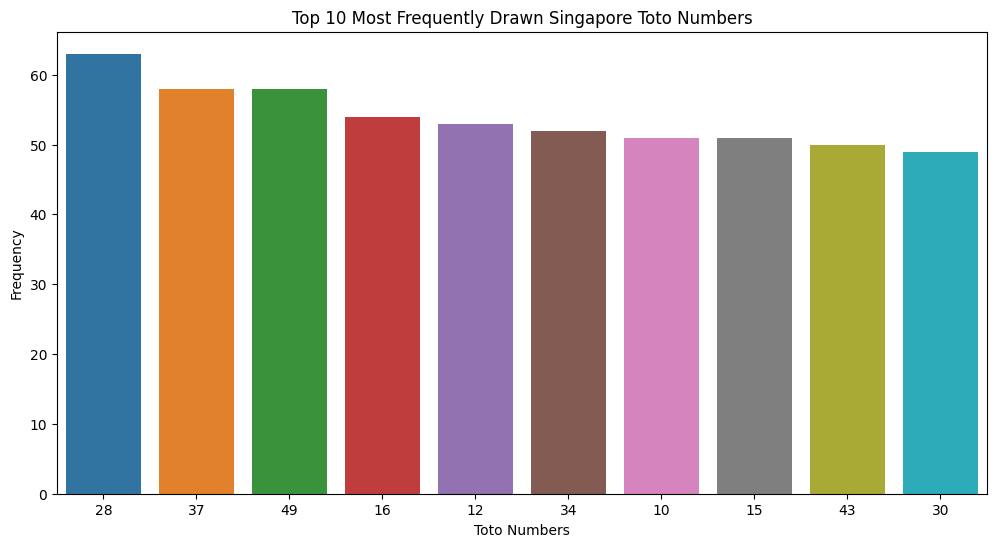

In [35]:
winning_number = ['winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'winning_number_6','additional_number']
new_df = pd.concat([df['winning_number_1'], df['winning_number_2'], df['winning_number_3'],df['winning_number_4'],df['winning_number_5'],df['winning_number_6'],df['additional_number']], ignore_index=True)
value_counts = new_df.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x=new_df, order = value_counts.index, palette='tab10')
plt.ylabel('Frequency')
plt.xlabel('Toto Numbers')
plt.title('Top 10 Most Frequently Drawn Singapore Toto Numbers')
plt.show()

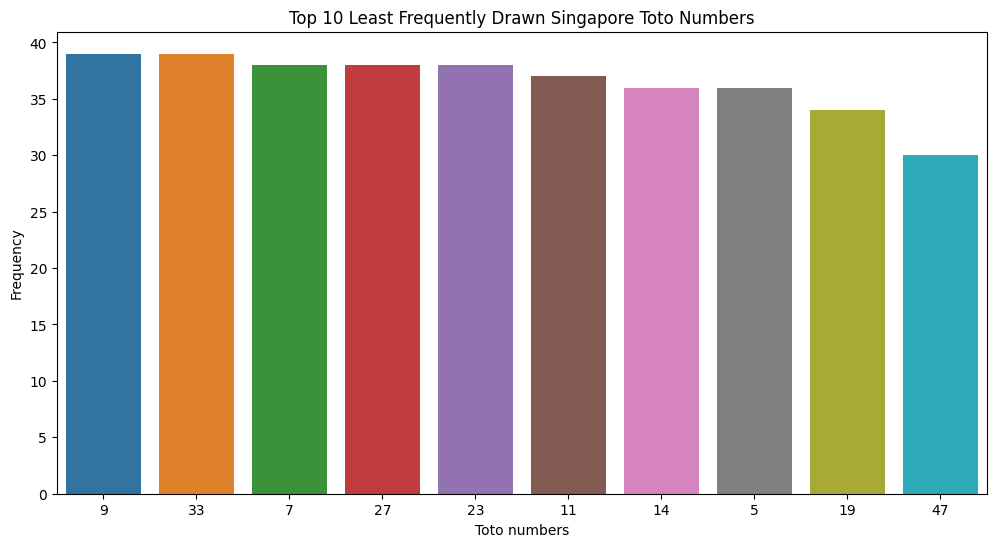

In [36]:
# EDA: Bottom 10 drawn frequent numbers
value_counts = new_df.value_counts().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x=new_df, order = value_counts.index[::-1], palette='tab10')
plt.ylabel('Frequency')
plt.xlabel('Toto numbers')
plt.title('Top 10 Least Frequently Drawn Singapore Toto Numbers')
plt.show()

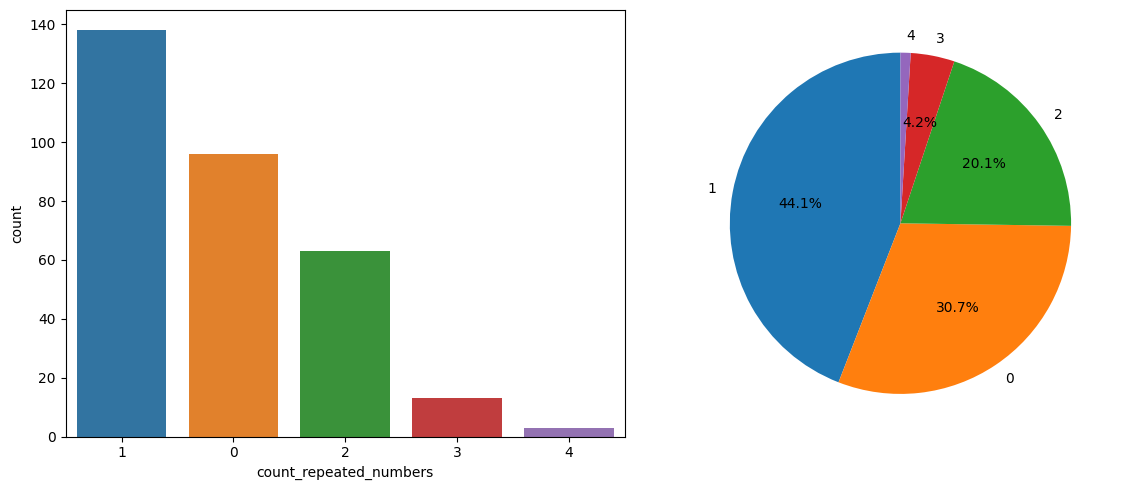

In [37]:
# How often do numbers from the previous draw reappear in subsequent draws?
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='count_repeated_numbers', data=df, order=df['count_repeated_numbers'].value_counts().index, palette='tab10')

# Subplot for the pie chart
values = df['count_repeated_numbers'].value_counts()
labels = values.index
percentages = values / values.sum() * 100

def autopct_condition(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct=autopct_condition, startangle=90)
plt.ylabel('')
plt.tight_layout()
plt.show()

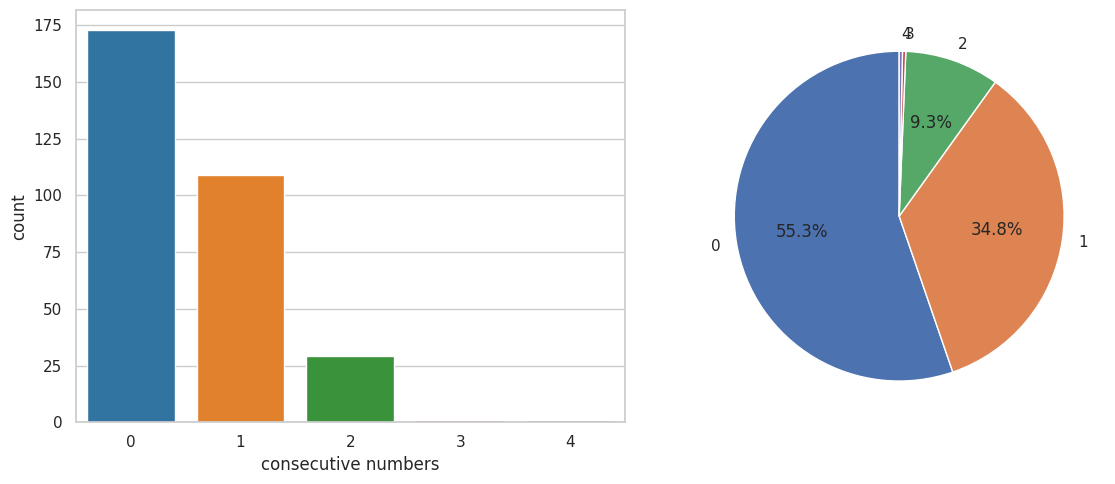

In [69]:
# Whether consecutive numbers (e.g., 9 and 10) more or less likely to appear together in winning combinations?
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='consecutive numbers', data=df, order=df['consecutive numbers'].value_counts().index, palette='tab10')

# Subplot for the pie chart
values = df['consecutive numbers'].value_counts()
labels = values.index
percentages = values / values.sum() * 100

def autopct_condition(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct=autopct_condition, startangle=90)
plt.ylabel('')
plt.tight_layout()
plt.show()

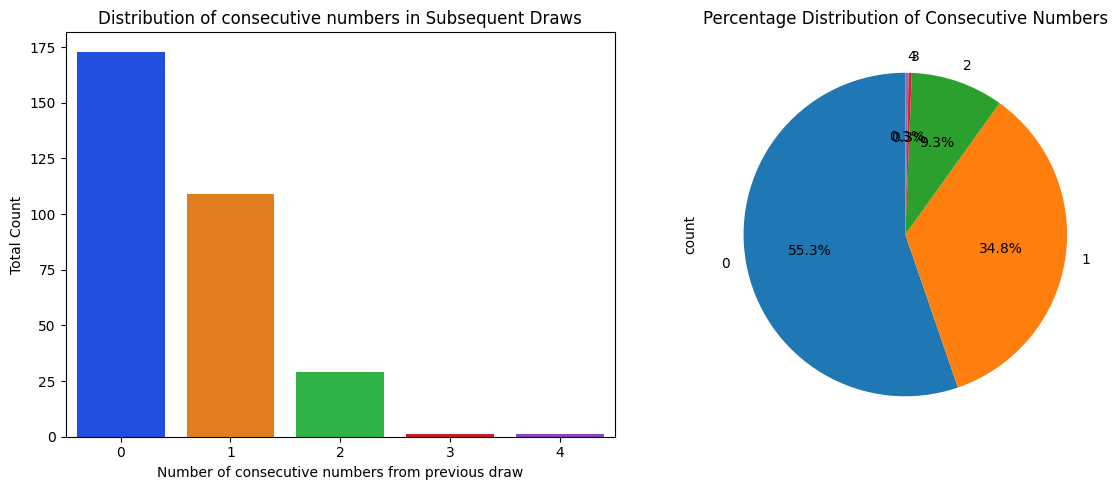

In [41]:
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='consecutive numbers', data=df, order=df['consecutive numbers'].value_counts().index, palette='bright')
plt.xlabel('Number of consecutive numbers from previous draw')
plt.ylabel('Total Count')
plt.title('Distribution of consecutive numbers in Subsequent Draws')

# Subplot for the pie chart
plt.subplot(1, 2, 2)
df['consecutive numbers'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Consecutive Numbers')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [42]:
lottery_data = np.sort(df[winning_number].values)

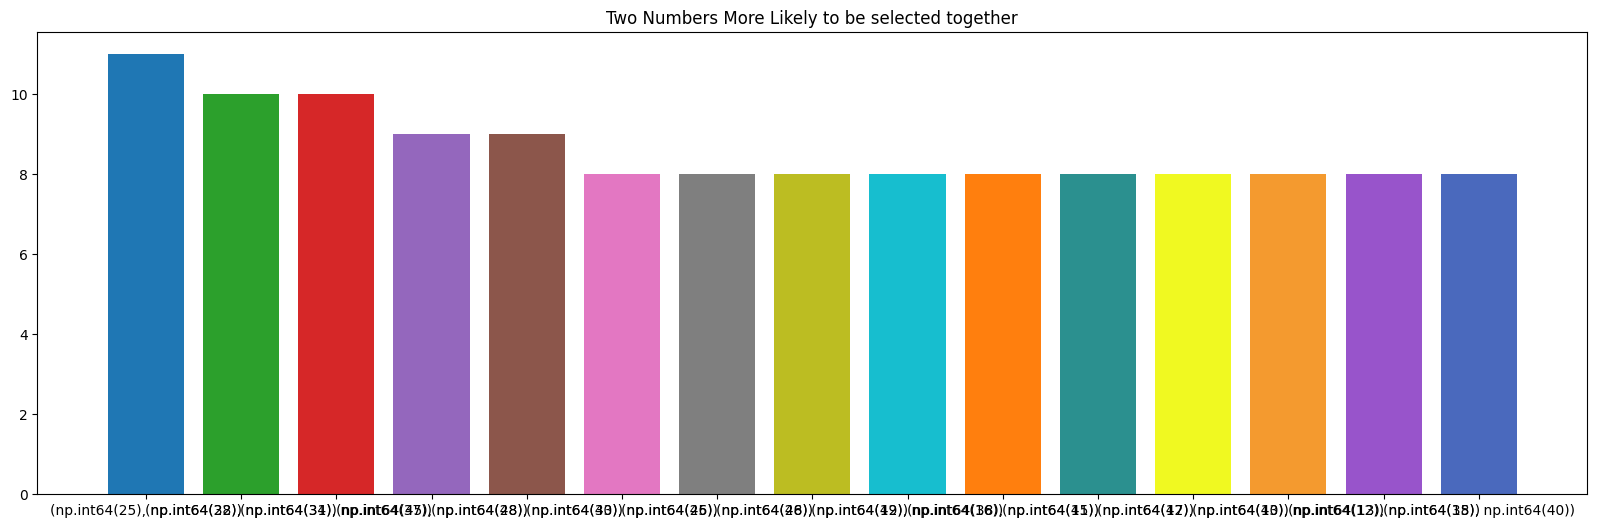

In [45]:
# EDA: Explore if certain numbers are more likely to be selected together
# (a) Which Two Numbers More Likely to be Selected Together?

from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 2

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(15)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.title('Two Numbers More Likely to be Selected Together')
plt.show()

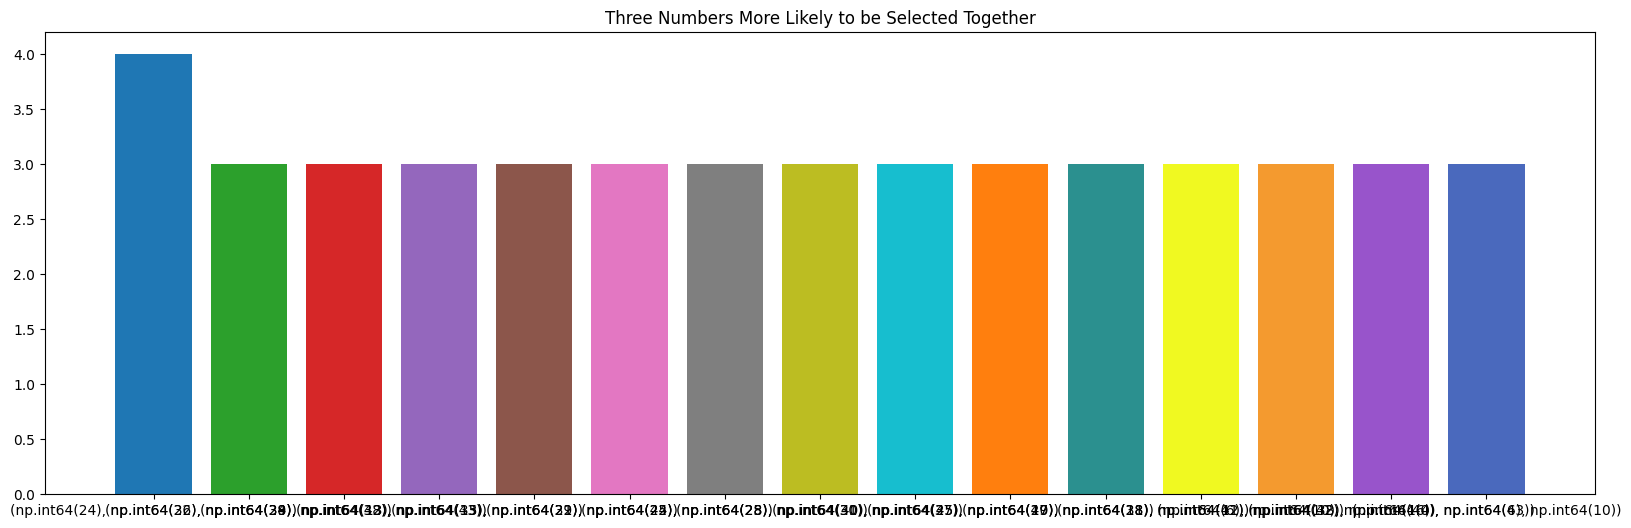

In [46]:
# (b) Which Three Numbers More Likely to be Selected Together?

from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 3

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(15)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.title('Three Numbers More Likely to be Selected Together')
plt.show()

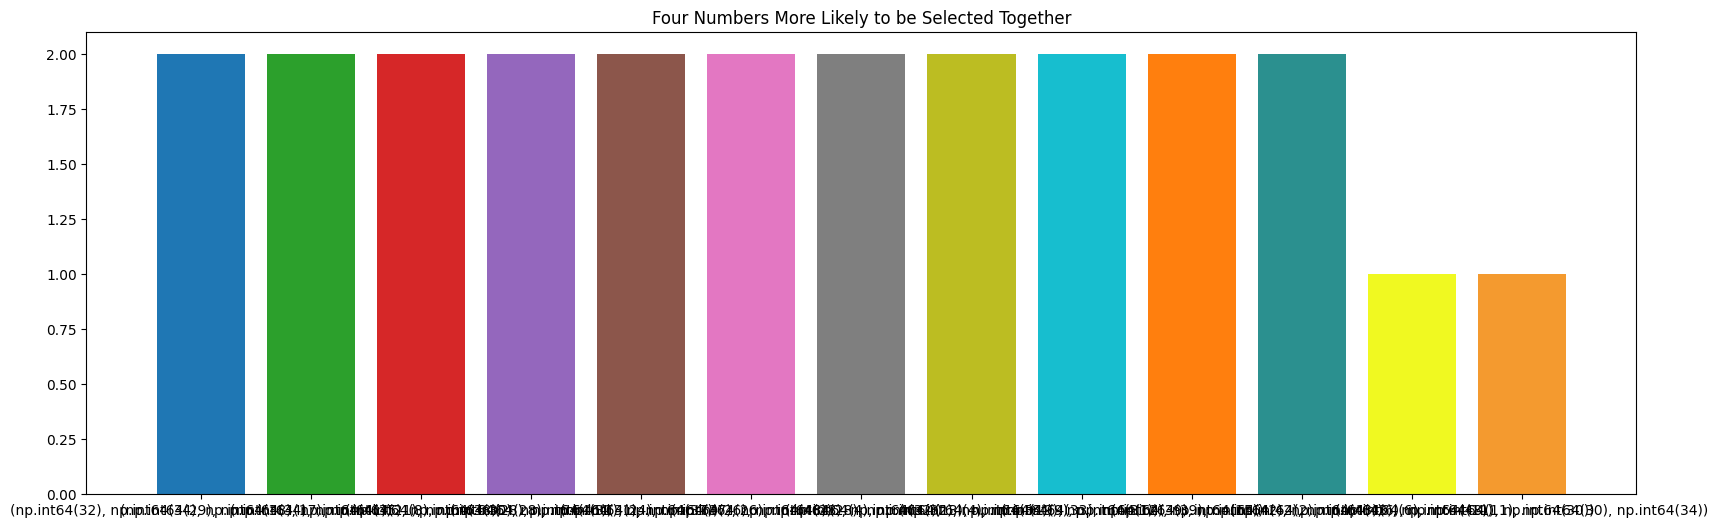

In [47]:
# (c) Which Four Numbers More Likely to be Selected Together?
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 4

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(13)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.title('Four Numbers More Likely to be Selected Together')
plt.show()

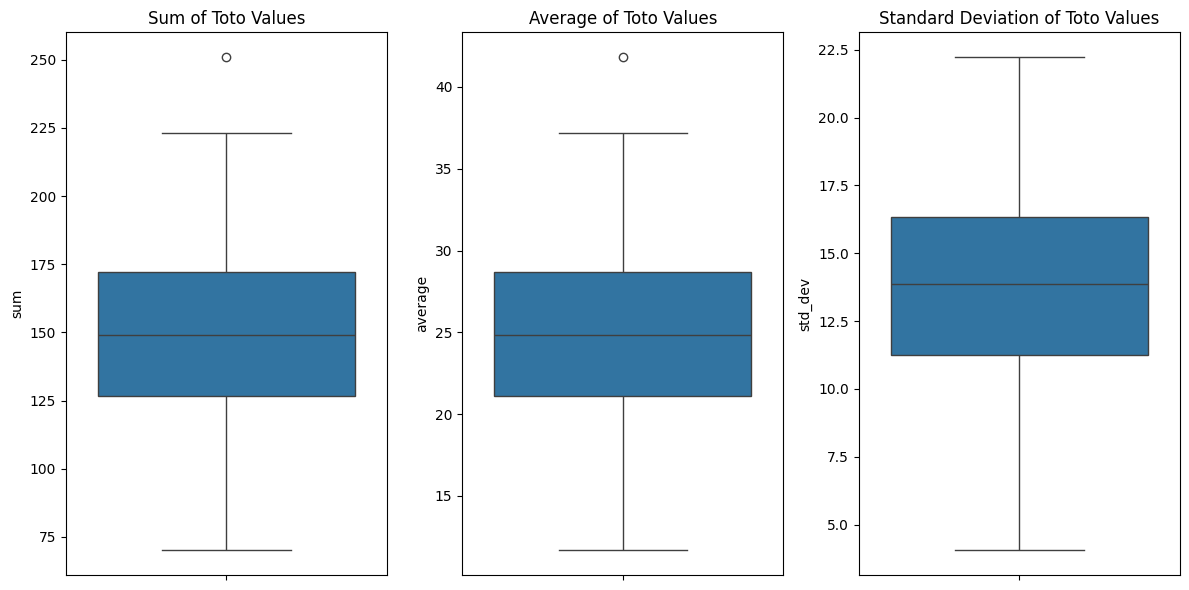

In [49]:
# EDA: Exploring whether smaller sum, average, and standard deviation of Toto values are associated with better chances of jackpot
from scipy.stats import ttest_ind

# Calculate summary statistics
df['sum'] = df[['winning_number_1', 'winning_number_2',
                                     'winning_number_3', 'winning_number_4',
                                     'winning_number_5', 'winning_number_6']].sum(axis=1)
df['average'] = df[['winning_number_1', 'winning_number_2',
                                         'winning_number_3', 'winning_number_4',
                                         'winning_number_5', 'winning_number_6']].mean(axis=1)
df['std_dev'] = df[['winning_number_1', 'winning_number_2',
                                          'winning_number_3', 'winning_number_4',
                                          'winning_number_5', 'winning_number_6']].std(axis=1)

# Select only draws where the first prize was won
first_prize_draws = df[df['Group 1 No.winning'] > 0]
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='sum', data=first_prize_draws)
plt.title('Sum of Toto Values')

plt.subplot(1, 3, 2)
sns.boxplot(y='average', data=first_prize_draws)
plt.title('Average of Toto Values')

plt.subplot(1, 3, 3)
sns.boxplot(y='std_dev', data=first_prize_draws)
plt.title('Standard Deviation of Toto Values')

plt.tight_layout()
plt.show()

In [51]:
non_first_prize_draws = df[df['Group 1 No.winning'] == 0]

print('No Winners for First Prize',non_first_prize_draws.shape)
print('At least 1 Winners for First Prize',first_prize_draws.shape)

No Winners for First Prize (162, 49)
At least 1 Winners for First Prize (151, 49)


Null Hypothesis(H0): A smaller sum, average, and standard deviation (SD) of Toto values do not affect the chance of winning the jackpot.
Alternative Hypothesis (H1): A smaller sum, average, and standard deviation (SD) of Toto values are associated with a better chance of winning the jackpot.

In [52]:
non_first_prize_draws['sum'].mean()

np.float64(154.3827160493827)

In [53]:
# Statistical Testing

t_stat, p_value = ttest_ind(first_prize_draws['sum'], non_first_prize_draws['sum'])
print(f"T-Statistic for sum: {t_stat}, p-value: {p_value}")

t_stat, p_value = ttest_ind(first_prize_draws['average'], non_first_prize_draws['average'])
print(f"T-Statistic for average: {t_stat}, p-value: {p_value}")

t_stat, p_value = ttest_ind(first_prize_draws['std_dev'], non_first_prize_draws['std_dev'])
print(f"T-Statistic for standard deviation: {t_stat}, p-value: {p_value}")

T-Statistic for sum: -1.8548137172195136, p-value: 0.06456911813026554
T-Statistic for average: -1.8548137172195154, p-value: 0.06456911813026528
T-Statistic for standard deviation: -0.6663554268213684, p-value: 0.5056779445421413


Interpretation:

For the sum and average of Toto values, the t-statistics indicate a significant difference between draws where the first prize was won and draws where it wasn't. The p-values are less than the significance level of 0.05, suggesting that this difference is statistically significant. Therefore, we reject the null hypothesis in favor of the alternative hypothesis.
However, for the standard deviation of Toto values, the t-statistic is not significant, as the p-value is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there's no significant difference in the standard deviation of Toto values between draws with and without first prize winners.

In [55]:
# EDA: Which year, month, and day of the week have the highest total number of jackpot?
rf = pd.DataFrame(df[df['Group 1 No.winning'] > 0]['year'].value_counts())
rf

,count
year,
2024,51
2023,47
2022,31
2025,22


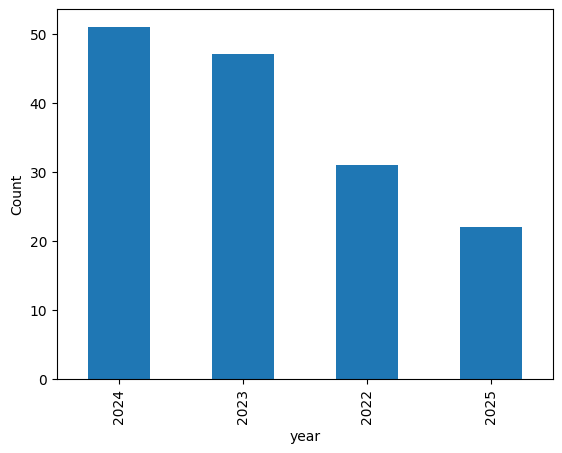

In [56]:
rf.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

In [58]:
rf1 = pd.DataFrame(df[df['Group 1 No.winning'] > 0]['month'].value_counts())
rf1

,count
month,
1,17
2,15
8,14
7,13
11,13
6,12
5,12
10,12
3,11


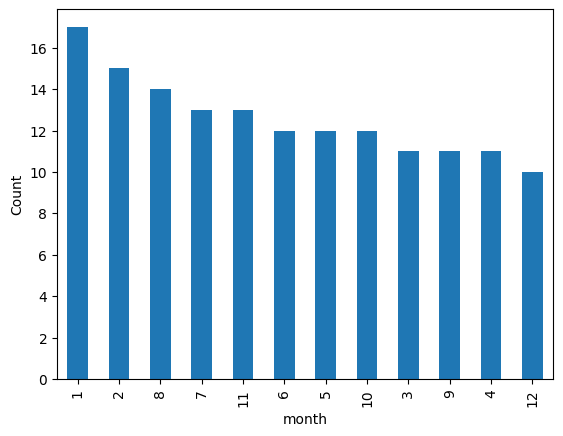

In [59]:
rf1.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

In [61]:
rf2 = pd.DataFrame(df[df['Group 1 No.winning'] > 0]['day_of_week'].value_counts())
rf2

,count
day_of_week,
Monday,79
Thursday,60
Friday,12


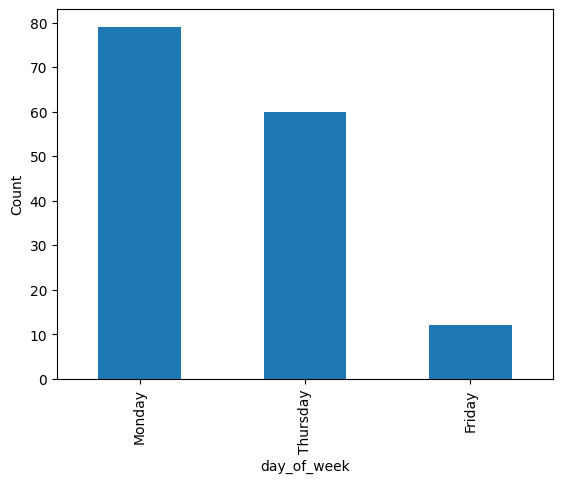

In [62]:
rf2.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

In [63]:
# EDA: Do Winning Numbers have any correlation?
lottery_data = df[['winning_number_1',	'winning_number_2',	'winning_number_3',	'winning_number_4' ,'winning_number_5'	,'winning_number_6'	,'additional_number']]
lottery_data.head()

,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number
0,6,11,30,34,43,45,2
1,8,13,19,34,37,47,29
2,12,19,26,28,46,49,41
3,12,28,29,34,41,47,16
4,7,14,15,16,17,38,44


In [64]:
winning_number_1 = lottery_data['winning_number_1']
winning_number_2 = lottery_data['winning_number_2']
winning_number_3 = lottery_data['winning_number_3']
winning_number_4 = lottery_data['winning_number_4']
winning_number_5 = lottery_data['winning_number_5']
winning_number_6 = lottery_data['winning_number_6']

In [65]:
from scipy.stats import spearmanr

winning_number_1 = lottery_data['winning_number_1']
winning_number_2 = lottery_data['winning_number_2']
winning_number_3 = lottery_data['winning_number_3']
winning_number_4 = lottery_data['winning_number_4']
winning_number_5 = lottery_data['winning_number_5']
winning_number_6 = lottery_data['winning_number_6']
# Perform the Mann-Whitney U test
statistic, p_value = spearmanr(winning_number_1, winning_number_6)

# Print the results
print("spearmanr :", statistic)
print("P-value:", p_value)

spearmanr : 0.09891230358790722
P-value: 0.080598698381668


In [66]:
from itertools import combinations
from scipy.stats import mannwhitneyu

winning_numbers = [lottery_data['winning_number_1'],
                   lottery_data['winning_number_2'],
                   lottery_data['winning_number_3'],
                   lottery_data['winning_number_4'],
                   lottery_data['winning_number_5'],
                   lottery_data['winning_number_6']]

results = []

for i, j in combinations(range(len(winning_numbers)), 2):

    statistic, p_value = spearmanr(winning_numbers[i], winning_numbers[j])

    results.append({'Pair': f'winning_number_{i+1} - winning_number_{j+1}',
                    'statistic': statistic,
                    'P-value': p_value})

# for result in results:
#     print(result)

results_df = pd.DataFrame(results)
results_df

,Pair,statistic,P-value
0,winning_number_1 - winning_number_2,0.675785,4.209243e-43
1,winning_number_1 - winning_number_3,0.454782,2.208048e-17
2,winning_number_1 - winning_number_4,0.294033,1.166027e-07
3,winning_number_1 - winning_number_5,0.180299,1.358448e-03
4,winning_number_1 - winning_number_6,0.098912,8.059870e-02
5,winning_number_2 - winning_number_3,0.713013,7.049135e-50
6,winning_number_2 - winning_number_4,0.520480,3.967794e-23
7,winning_number_2 - winning_number_5,0.341386,5.543021e-10
8,winning_number_2 - winning_number_6,0.181722,1.242013e-03
9,winning_number_3 - winning_number_4,0.745253,1.098168e-56


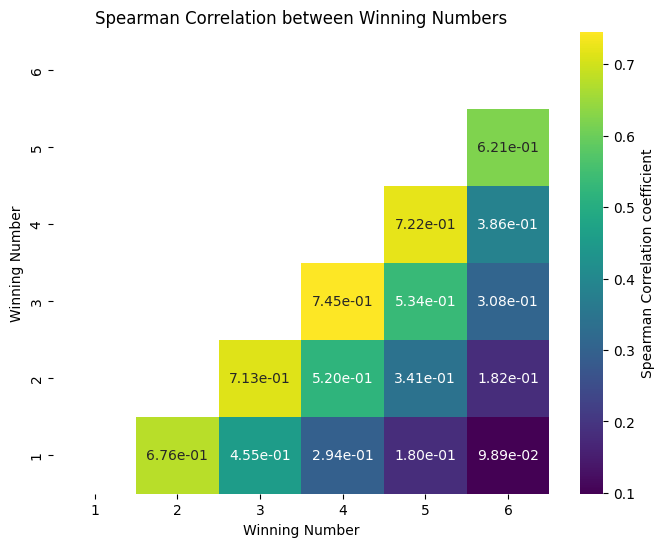

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Reshape the p-values into a matrix form
p_values_matrix = np.zeros((6, 6))
for result in results:
    pair = result['Pair'].split(' - ')
    i = int(pair[0].split('_')[-1]) - 1
    j = int(pair[1].split('_')[-1]) - 1
    p_values_matrix[i, j] = result['statistic']

# Replace zero values with NaN
p_values_matrix[p_values_matrix == 0] = np.nan

# Create a heatmap of the p-values
sns.heatmap(p_values_matrix, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Spearman Correlation coefficient'})
plt.title('Spearman Correlation between Winning Numbers')
plt.xlabel('Winning Number')
plt.ylabel('Winning Number')
plt.xticks(ticks=np.arange(0.5, 6.5), labels=np.arange(1, 7))
plt.yticks(ticks=np.arange(0.5, 6.5), labels=np.arange(1, 7))
plt.gca().invert_yaxis()  # Invert y-axis to match DataFrame index order
plt.show()

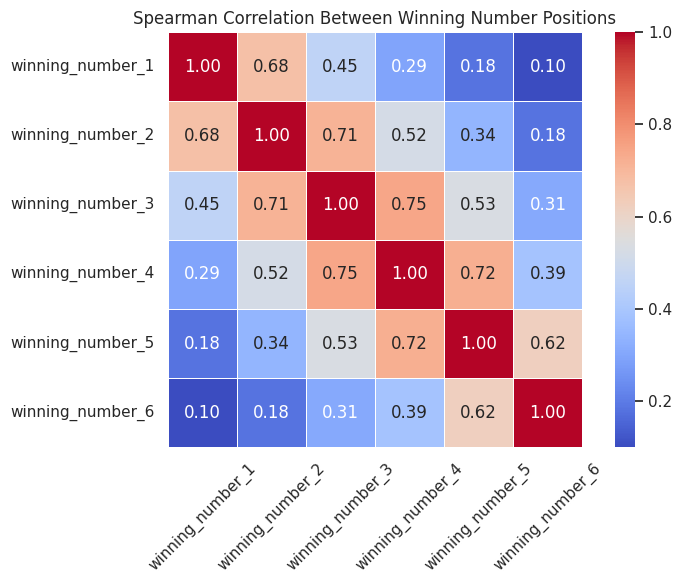

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set seaborn style
sns.set(style="whitegrid")

# Extract only the winning number columns
winning_number_cols = [
    'winning_number_1',
    'winning_number_2',
    'winning_number_3',
    'winning_number_4',
    'winning_number_5',
    'winning_number_6'
]

# Create a new DataFrame with just the winning numbers
winning_data = df[winning_number_cols]

# Compute the Spearman correlation matrix (better for ranks and monotonic trends)
correlation_matrix = winning_data.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Spearman Correlation Between Winning Number Positions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()